# Supervised Learning - LR Model Assumptions

Assumptions for LR https://warwick.ac.uk/fac/soc/economics/staff/vetroeger/teaching/po906_week8910.pdf

Full econometric course playlist https://www.youtube.com/watch?v=M_5SLG7sUa0&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU

This notebook introduces to Model assumptions and limitations in Linear Regression.

### Population and Sample

Population is all observations for a given problem, while sample is just part of population. We want to estimate some underlying relationships in population using only sample from it. That's the essence of statistical modeling.

![alt text](https://newonlinecourses.science.psu.edu/stat200/sites/stat200/files/inline-images/InferenceGraphicSU17.png)

### Bias, Consistency, Efficiency (comparison of estimators)

Let's suppose we have data describing number of shootings and number of casualties. Intuitevly as the number of shootings rises the number of casualties will rise. Let's suppose there exists a linear relationship (which comes from population) namely 1000 shootings will result on average 5 casualties. So coefficient $\beta$ will be 0.002. <br>
Let $b$ be our estimator from a sample.
**bias** is defined in the following way:
$$bias = E(b) - \beta$$
If _bias_ is 0, then our estimator on average is the same as population coefficient. Thus $b$ will on average be 0.02 if we repeated the experiment by changing the sample.<br>


![alt text](http://reliawiki.com/images/3/35/Doe34.png)

**consistency** is defined in the following way:
$$\text{while } n \rightarrow \infty,b \rightarrow \beta$$
This means while our sample size is increasing we are getting closer to the real coefficient.<br>


![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Consistency_of_estimator.svg/1200px-Consistency_of_estimator.svg.png)

**efficiency** is defined between 2 estimates:<br>
$b_1$ estimate is _efficient_ than $b_2$ estimate if $var(b_1)<var(b_2)$<br>


![alt text](https://images.slideplayer.com/27/8964759/slides/slide_15.jpg)

These terms are theoretical rather than practical. They are nice to have properties for any estimate, but understanding how those relate to our problems helps understanding and modyfing algorithms to be better.

### Assumptions for Linear Regression

Let's formulate LR equations with appropriate coefficients.

Real relationship in population
$$y_i = \beta_0+\beta_1x_i+\varepsilon_i$$
Realtionship with estimated coefficients
$$y_i = b_0+b_1x_i+\varepsilon_i$$ 
Estimated regression line
$$\hat{y}_i = b_0+b_1x_i$$ 


**1)** The relationship you want to model has to be linear (or at least vaguely close enough to being linear).<br>
**2)** Random sampling, i.e. the sample you take is a representative of population.<br>
**3)(GM)** $E(\varepsilon_i|x_i) = 0$, i.e. given the sample the expectation of error term should be zero.<br> 
**4)(GM)** $E(\varepsilon_i^2|x_i) = \sigma^2 = constant$, i.e. std of error term doesn't depend on $x$.<br>
**5)(GM)** $Corr(\varepsilon_i,\varepsilon_j) = 0, i\neq j$, i.e. no error term of an observation could be used to predict other error term of other observation (usually this is eqivalent to assumption 2, but in _Time series_ it is not the case).<br>
**6)(GM)** $Corr(x_i,\varepsilon_i) = 0$, i.e., there should not be some pattern in error term correlated with $x$.<br>
**7)(optional)** $|Corr(x_i,x_j)| > \alpha, i\neq j$, where  $\alpha$ is somewhat close to 1, i.e., independent variables can't linearly predict each other with high accuracy (In practice VIF is used to test this assumpton, which is more general than just _corr_).<br>
**8)(optional)** $\varepsilon_i$ ~ $N(0,\sigma^2)$, i.e. error term should have normal distribution.

First 2 assumptions are needed to get 'sensible' results, as violations of those usually results in finding spurious relationships.

If all **Gauss-Markov** assumptions are met than, the estimators are **BLUE** (Best Linear Undiased Estimators).<br>
Best means it is _efficient_.<br>
_Linear_ means that we only considered estimators from linear family.<br>
_Unbiased_ means what it says.

Let's prove it.<br>
_A link to proof nicely explained https://www.youtube.com/watch?v=V5gR6nBOC9E . Watch all parts._<br>
_And a 3 page description of some details of the the proof http://www.nyu.edu/econ/user/flinnc/courses/0266/gauss-markov%20theorem.pdf_

Proving that $b$ is unbiased:
$$b=(X^TX)^{-1}X^TY$$<br>
$$E(b) = E((X^TX)^{-1}X^TY)$$<br>
$$E(b) = (X^TX)^{-1}X^TE(Y)$$<br>
$$E(b) = (X^TX)^{-1}X^TE(X\beta+\varepsilon)$$<br>
As the expectation of sum is the sum of expectations and from assumption 3 and  6 states $E(\varepsilon|X) =E(\varepsilon) =  0$<br><br>
$$E(b) = (X^TX)^{-1}X^TX\beta$$<br>
$$E(b) = I\beta$$<br>
$$E(b) = \beta$$

Proving that $b$ is efficient means that $var(b)\le var(\tilde{b})$ for every linear estimator $\tilde{b}$

Without loss of generality let's construct $\tilde{b}= CY = [(X^TX)^{-1}X^T+D]Y$, where D is non-zero matrix.

First we should prove that $\tilde{b}$ is unbiased. Thus,
$$E(\tilde{b}) = E([(X^TX)^{-1}X^T+D]Y)$$<br>
$$E(\tilde{b}) = \beta+E(DY)$$<br>
$$E(\tilde{b}) = \beta+E(D(X\beta+\varepsilon))$$<br>
As $D$ is deterministic and we have assumptions 3,6 thus $E(D\varepsilon) = DE(\varepsilon) = 0$
<br><br>
$$E(\tilde{b}) = \beta+DX\beta$$

So, in order for $\tilde{b}$ to be unbiased we should have $DX = 0$

Let's calculate variance of our estimators.
$$var(b) = E((b-\beta)(b-\beta)^T) = $$<br>
$$= E(((X^TX)^{-1}X^T\varepsilon)((X^TX)^{-1}X^T\varepsilon)^T) = $$<br>
$$ = E(((X^TX)^{-1}X^T\varepsilon)(\varepsilon^T X(X^TX)^{-1})) $$<br>Using assumption 4 $E(\varepsilon\varepsilon^T) = \sigma^2$ and considering assumption 6<br><br>
$$var(b)= (X^TX)^{-1}X^T\sigma^2X(X^TX)^{-1} = $$ <br>
$$= \sigma^2(X^TX)^{-1}X^TX(X^TX)^{-1}$$<br>
$$= \sigma^2(X^TX)^{-1}$$

$$var(\tilde{b}) = E((CY)(CY)^T) = $$<br>
$$= E(CYY^TC^T) = $$<br>
$$ = CE(YY^T)C^T $$<br>
As $X$ and $\beta$ are deterministic, $var(Y) = var(X\beta+\varepsilon) = var(\varepsilon) = \sigma^2$<br><br>
$$var(\tilde{b})= [(X^TX)^{-1}X^T+D]\sigma^2[(X^TX)^{-1}X^T+D]^T= $$<br>
$$= [(X^TX)^{-1}X^T+D]\sigma^2[X(X^TX)^{-1}+D^T]= $$<br>
$$= \sigma^2[(X^TX)^{-1}X^TX(X^TX)^{-1}+(X^TX)^{-1}X^TD^T+DX(X^TX)^{-1}+DD^T]$$<br>
The first sum is $var(b)$. As $(DX)^T = X^TD^T$, then $X^TD^T=0$, thus <br><br>
$$var(\tilde{b})= var(b)+\sigma^2DD^T$$

$DD^T$ is positive semi definite matrix (power of 2 equivalent for matrices), which means that $var(\tilde{b}) >var(b)$. 

### consequences of violations (present new ideas needed for consenquences p-values, standard errors)

### F test, R squared

### Treating (1) Linear Relationship

If 1st assumption is violated, we might get a relationship which does not exist or is too "linear".

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression

In [0]:
# Generate random data for a persons age
age = np.random.randint(100,size = 300)

def height_func(a):
    
    """Function that simulates height data according to age"""
    
    if a<25:
        r = 30+1.99**5.5*np.log(a+1)+np.random.normal(0,5)
    elif a>=25 and a <=65:
        r = 30+5.5*25 + np.random.normal(0,5)
    else:
        r = 30+5.5*25 - (a-65)+ np.random.normal(0,5)
    return r

# Calculate height based on the function
height = np.vectorize(height_func)(age)

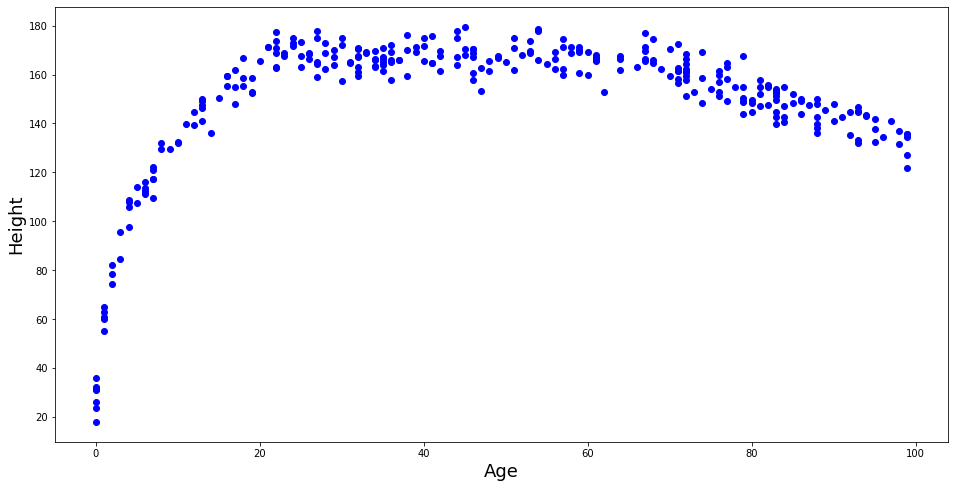

In [0]:
# plot Age against Height
plt.figure(figsize = (16,8))
plt.plot(age,height,'bo')
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Height', fontsize = 18)
plt.show()

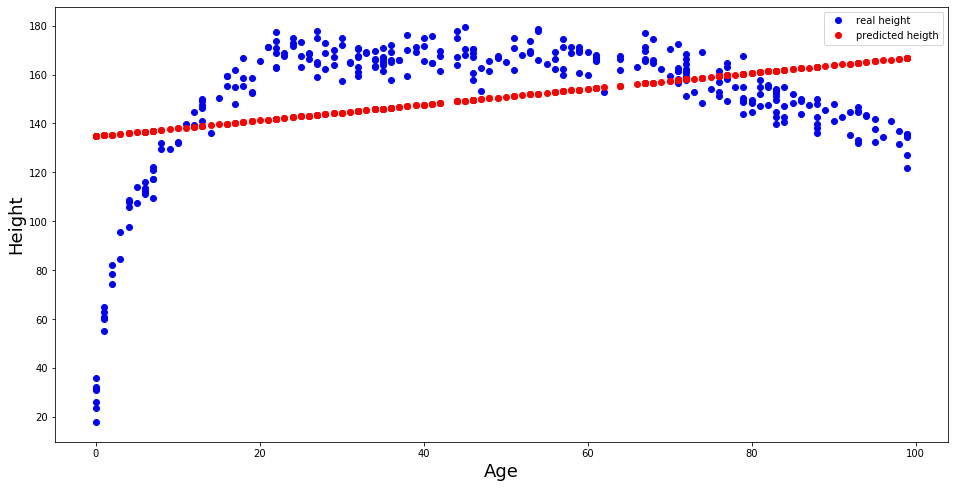

In [0]:
# Make a simple regression model
ols = LinearRegression()
ols.fit(age.reshape(-1, 1),height)
pred_line = ols.predict(age.reshape(-1, 1))

plt.figure(figsize = (16,8))
plt.plot(age,height,'bo', label = 'real height')
plt.plot(age,pred_line,'ro', label = 'predicted heigth')
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Height', fontsize = 18)
plt.legend()
plt.show()

The height function we provided has logarithmic relationship with age and regressing on age only will give linear relationship. Thus, it can not capture the rapid growth in early ages and decline in old ages.

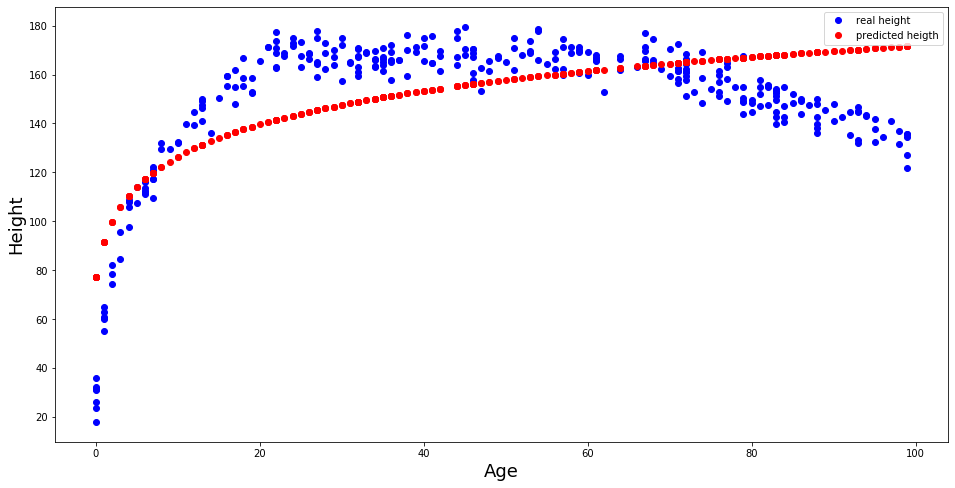

In [0]:
# Calculate logarithm og age
age_log = np.log(age+1)

# Make a simple LR with age_log instead of age
ols = LinearRegression()
ols.fit(age_log.reshape(-1,1),height)
pred_line = ols.predict(age_log.reshape(-1,1))

plt.figure(figsize = (16,8))
plt.plot(age,height,'bo', label = 'real height')
plt.plot(age,pred_line,'ro', label = 'predicted heigth')
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Height', fontsize = 18)
plt.legend()
plt.show()

Transforming age to logarithm scale solves the rapid growth part, but doesn't account for decline.

We an do some feature engineering to accomodate the fact of decline at older ages.

In [0]:
X = pd.DataFrame({'age': age,'age_log':age_log})

In [0]:
X['65_more'] = X['age'].apply(lambda x: int(x>65))

In [0]:
X['age_65_more'] = X['age']*X['65_more']
X['age_log_65_less'] = X['age_log']*(1-X['65_more'])

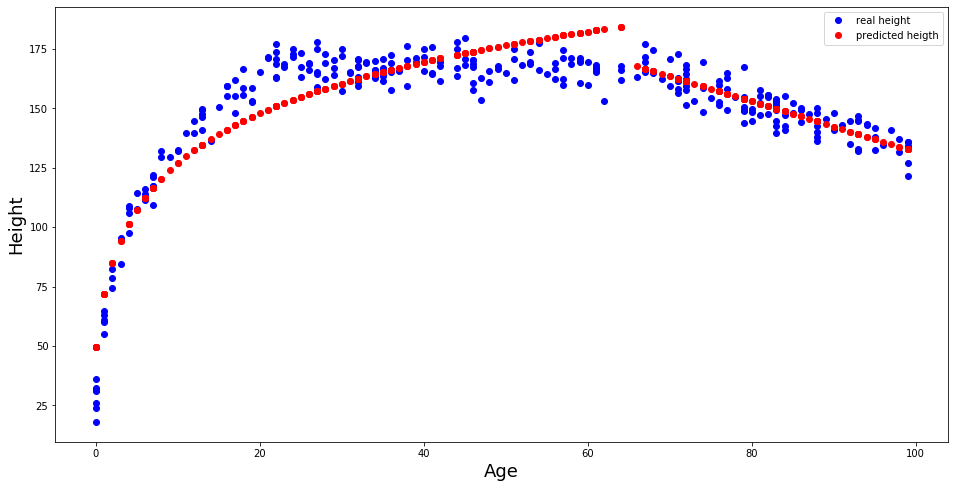

In [0]:
X_select = X[['age_65_more','age_log_65_less','65_more']]

ols = LinearRegression()
ols.fit(X_select,height)
pred_line = ols.predict(X_select)

plt.figure(figsize = (16,8))
plt.plot(age,height,'bo', label = 'real height')
plt.plot(age,pred_line,'ro', label = 'predicted heigth')
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Height', fontsize = 18)
plt.legend()
plt.show()

Now it's much better.

Or another treat is just simply use other models like a NN below (NOTE: sometimes it gets stuck in local minima)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
# preproccesing input for better convergence
scaler = StandardScaler()
age_s = scaler.fit_transform(age.reshape(-1, 1))

In [0]:
%%time
# NN model
model = Sequential()
model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(age_s, height, epochs=400, batch_size=50)









Epoch 1/400





300/300 [==============================] - 1s 3ms/step - loss: 23476.3460
Epoch 2/400
300/300 [==============================] - 0s 40us/step - loss: 23449.8210
Epoch 3/400
300/300 [==============================] - 0s 39us/step - loss: 23413.2441
Epoch 4/400
300/300 [==============================] - 0s 38us/step - loss: 23354.3314
Epoch 5/400
300/300 [==============================] - 0s 42us/step - loss: 23260.6191
Epoch 6/400
300/300 [==============================] - 0s 56us/step - loss: 23116.6292
Epoch 7/400
300/300 [==============================] - 0s 43us/step - loss: 22893.6051
Epoch 8/400
300/300 [==============================] - 0s 44us/step - loss: 22560.8678
Epoch 9/400
300/300 [==============================] - 0s 45us/step - loss: 22060.1064
Epoch 10/400
300/300 [==============================] - 0s 43us/step - loss: 21328.7077
Epoch 11/400
300/300 [==============================] - 0s 41us/step - loss: 20283.6048
Epoch 12/400
300/300 [========

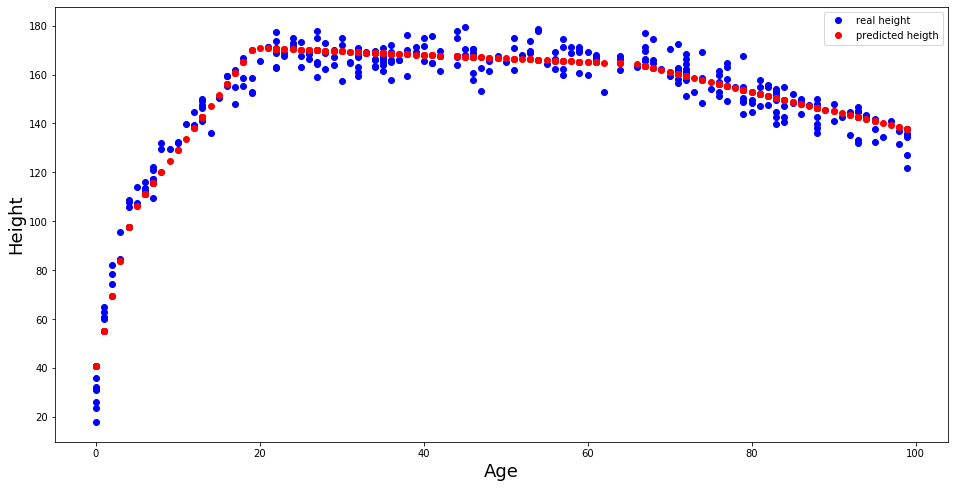

In [0]:
pred_line = model.predict(age_s)

plt.figure(figsize = (16,8))
plt.plot(age,height,'bo', label = 'real height')
plt.plot(age,pred_line,'ro', label = 'predicted heigth')
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Height', fontsize = 18)
plt.legend()
plt.show()

### Treating (2) Random Sampling

If 2nd assumption is violated, then any model we make has a sample bias in it, as sample characteristics are significantly different from population. Treating this assumption is rather hard. One way is to gather another dataset. Another way could be getting some information about population and treat models with the information so the data would not skew results very much. This could be done in Bayesian modeling, where you provide a nice prior to a model.

### Treating (3) Zero mean Error and (6) Correlation between X and Error

Violating assumption 3 (in Times series also assumption 5) and/or 6 resultes in biased and inconsistent estimates.<br><br>
$$E(b) = E((X^TX)^{-1}X^TY)$$<br>
$$E(b) = E[(X^TX)^{-1}X^T(X\beta+\varepsilon)]$$<br>
$$E(b) = \beta+E[(X^TX)^{-1}X^T\varepsilon] \ne \beta$$

Some times this violation is called **endogeniety** problem. The detailed list of reasons can be found at https://people.stfx.ca/tleo/econ370term2lec3.pdf

The most common reason is _omitted variable bias_, which is usually treated identifying which significant variables were exluded from the regression and including them.

The above example of Age and Height relationship, could also be considered as treating by adding missing important variables.

### Treating (7) Multicolinearity/Perfect Colinearity

In case of Perfect colinearity the coeficients can't be computed. The reason is that Perfect Colinearity results in 0 determinant of $X$. That means $X^TX$ can't be inverted.<br>
Multicolinearity may result in numerical instability and makes regression interpretation incorrect. As regression interpretation is _ceteris paribus_, then if we change one of highly correlated variables, there is a high chance that it will affect the other variable. Antoher problem is that, the coefficients of correlated variables become sensitive to dataset. Slight change of data might result in high change of coeficients.<br>
The brute force treatment is to drop one of the correlated variables (or in case collinearity in some combination of variables, drop such that the correlation disapeares). More sophisticated solution is to use techniques like PCA (Principal Component Analysis) to lower the dimenasion and remove collinearity of variables.

Lets generate data to illustrate what is happening.

In [0]:
# Multicollinearity
X1 = np.array([np.random.random(size = 100)+10])
X2 = 5*X1+np.random.random(size = 100)
Y = X1+25*X2 + 25*np.random.random(size = 100)+500

In [0]:
sim_data = pd.DataFrame(columns = ['y','1','x1','x2'])
sim_data['y'] = Y[0]
sim_data['x1'] = X1[0]
sim_data['x2'] = X2[0]
sim_data['1'] = [1 for i in range(100)]

In [0]:
sim_data.corr()

,y,1,x1,x2
y,1.000000,NaN,0.969133,0.982761
1,NaN,NaN,NaN,NaN
x1,0.969133,NaN,1.000000,0.985407
x2,0.982761,NaN,0.985407,1.000000


Running the experiment again you will get highly varying results for $x1$ and also $x2$ will somtimes vary a lot.

In [0]:
m = sm.OLS(sim_data['y'],sim_data[['1','x1','x2']])
r = m.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1371.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           7.54e-72
Time:                        22:21:35   Log-Likelihood:                -336.54
No. Observations:                 100   AIC:                             679.1
Df Residuals:                      97   BIC:                             686.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            492.7398     26.012     18.943      0.0

Remvoing $x1$ coefficient of $x2$ won't vary a lot, and the regression will be more stable.

In [0]:
m = sm.OLS(sim_data['y'],sim_data[['1','x2']])
r = m.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2769.
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.17e-73
Time:                        22:21:48   Log-Likelihood:                -336.56
No. Observations:                 100   AIC:                             677.1
Df Residuals:                      98   BIC:                             682.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            493.4261     25.704     19.197      0.0

As we know <br>
$$Var(b)= \sigma^2(X^TX)^{-1}$$<br>
The std err (_standard error_) is just the square root of _variance_ and added the number of observations.<br><br>
$$SE(b)= \sigma(N*X^TX)^{-1/2}$$<br>
$t-statistic$ is checking the hypothesis for $b=0$ (hypothesis testing is done with $ t_{n-p}$ distribution, where $n$ is the number of observations and $p$ is the number of parameters. if $n-p$ is large then, normal distribution can be used instead). It is constructed in the follwoing way:<br><br>
$$t = \frac{b-0}{SE(b)}$$<br>
$p-value$ is the probability that corresponding coefficient can be 0. i.e. if it is more than 0.05 we can't reject the hypothesis that it is 0.<br>
The confidence intervals are $(coef -2*SE,coef + 2*SE)$

The _R-squared_ is  a metric which shows how much the variablity of $X$ explains the variability of $Y$. The idea is the following:<br>
_Construct a simple predictor for y by using the average y. Construct second model using X. Then we compare how much variance is 2nd model capturing in comparison with 1st model._

$$SST = \sum_\limits{i}(y_i-\bar{y})^2$$
$$SSR = \sum_\limits{i}(\hat{y}_i-\bar{y})^2$$
$$SSE = \sum_\limits{i}(y_i-\hat{y})^2$$
$$SST = SSR + SSE$$
$$R^2= 1-\frac{SSE}{SST}$$


By definition _R-squared_ will only increase as we include more variables. Thus we can infalte it's value be adding non snensical variables. To account for that phenomenon and adjustment is made to it which accounts the number of variables being estimated.

$$R^2_{adj}= 1-(1-R^2)\frac{n-1}{n-p-1}$$

$n$ is sample size, $p$ is variable count.

### Treating (4) Heteroscedasticity

Violation of homoscedasticity brings to wrong standard errors. Thus our estimator of _beta_ - s are still _BLUE_ but the standard errors are incorrect and a false the regression might show wrong relationship.
There are many methods of treating heteroscedasticty. One of them is to transfrom your variables and try regression on transfrom variables. If that doesn't work you can try to estimate a _robust_ linear regression, which accounts for error terms while calculating the standart errors for coeficients. This is a conservative approach, standard errors will generally be larger and importance of variables is treated more carefully. Antoehr method could be to investigate how is are the errors distributed and make a variable account of that distribution.

### Treating (8) Normality

The normality assumption makes sense when we have a small sample size. If sample size is sufficiently large then means anyway have normal distributioon, thus there is no need for assumption. Violation of normality assumption will give skewed p-values. Usually normality assumption is ignored, or number of observations is increased to avoid violaion of it.

# Exercise

Use the code you wrote for Linear Regression and add the calculation of **p_values**, **SE**-s, **R-squared**, and **adjusted R-squared**. Add a method _report_ which will return **R-squared**, **adjusted R-squared** and each variable  **name**, **coef**, **p_value**, **SE** (similar to summary function on statsmodels).